In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

## Coding Exercise 1: Defining parameters

In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


## Coding Exercise 2: Simulating an input current

In [4]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Print value of i
  print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688176e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


## Coding Exercise 3: Printing pretty numbers

In [5]:
x = 3.14159265e-1
print(f'{x:.3f}')

print(f'{x:.4e}')


0.314
3.1416e-01


In [6]:
# Initialize step_end
step_end = 10

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Print value of t and i
  print(f'{t:.3f} {i:.4e}')

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


## Coding Exercise 4: Simulating membrane potential

In [7]:
#################################################
## TODO for students: fill out compute v code ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to fill out code to compute v")
#################################################

# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt 

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


## Coding Exercise 5: Plotting current

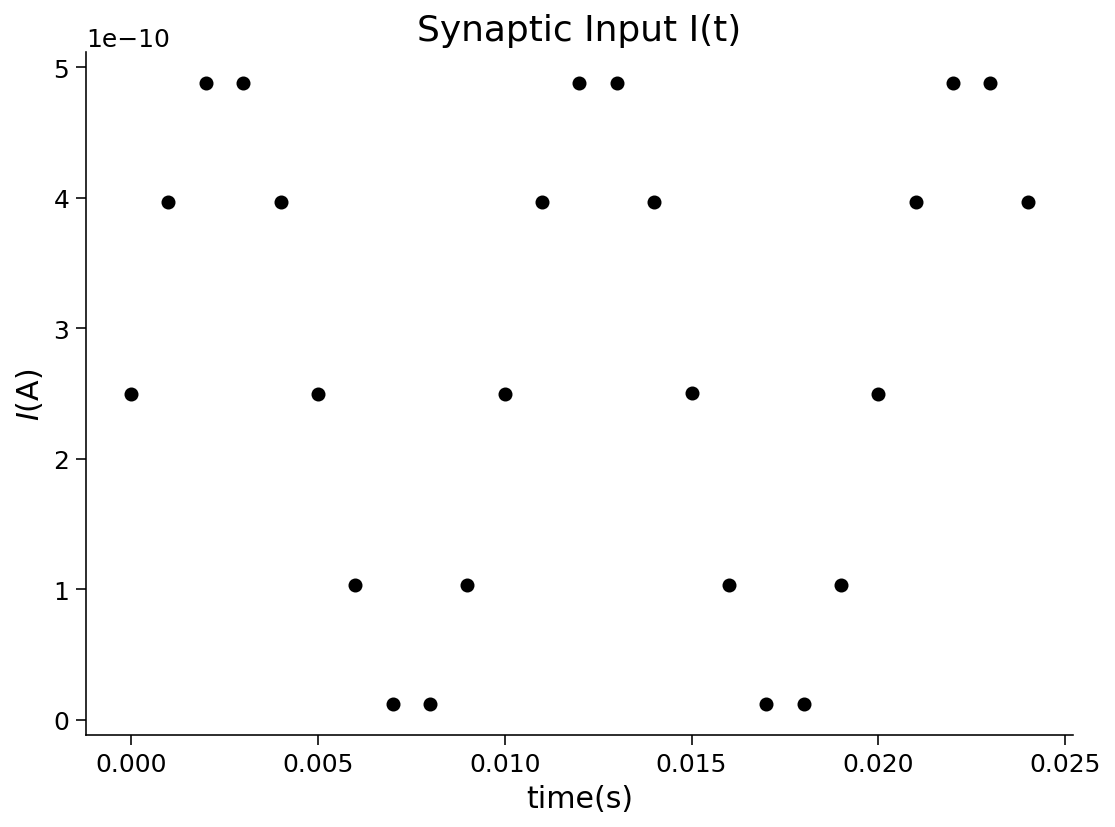

In [8]:
#################################################
## TODO for students: fill out the figure initialization and plotting code below ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to fill out current figure code")
#################################################

# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('time(s)')
plt.ylabel('$I$(A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

## Coding Exercise 6: Plotting membrane potential

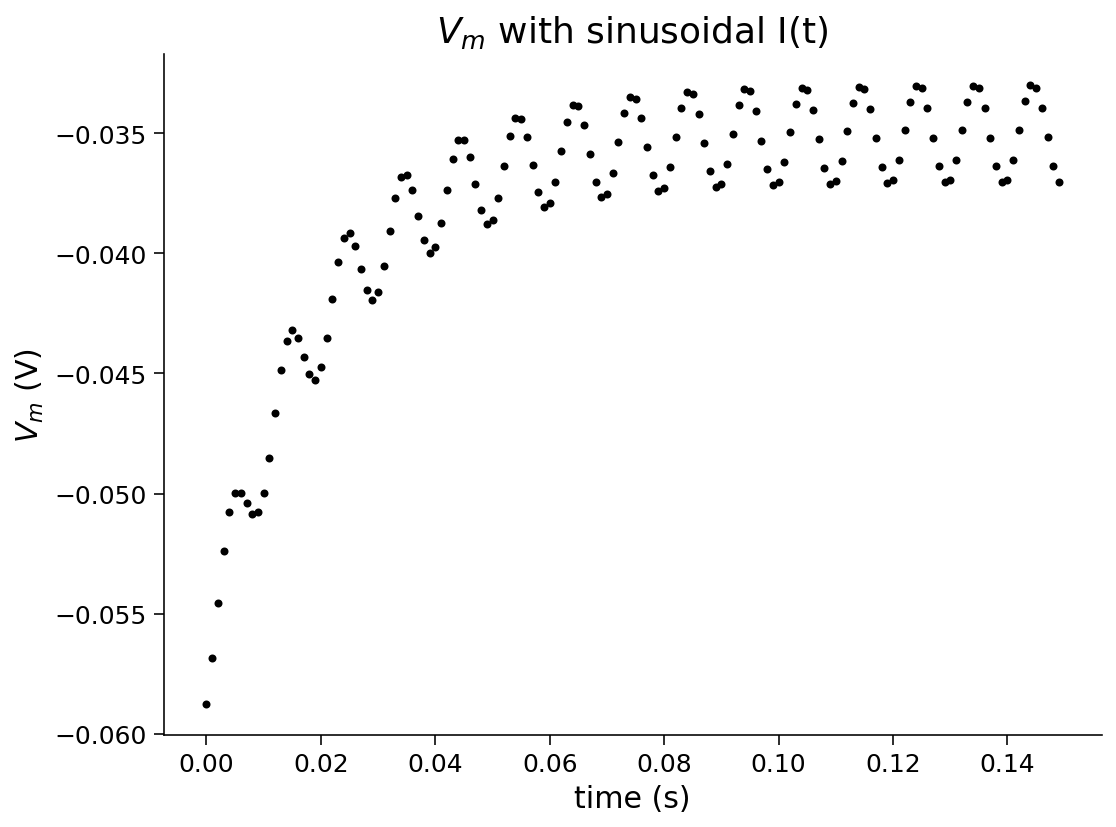

In [9]:
#################################################
## TODO for students: fill out the figure initialization and plotting code below ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to fill out membrane potential figure code")
#################################################

# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')

# Display plot
plt.show()

## Coding Exercise 7: Adding randomness

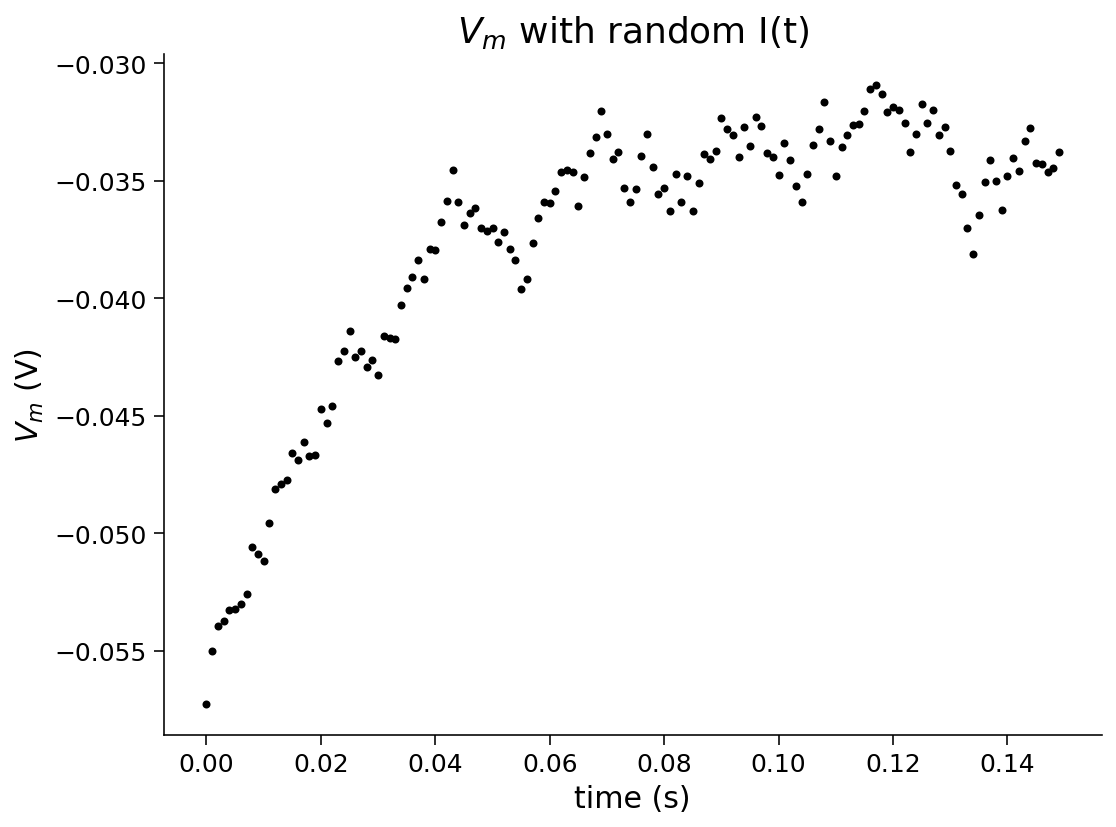

In [10]:
#################################################
## TODO for students: fill out code to get random input ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to fill out random input code")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = 2* np.random.random() - 1

  # Compute value of i at this time step
  i = i_mean*(1+0.1 *(t_max/dt)** (0.5) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

## Coding Exercise 8: Storing simulations in lists

### Ensemble statistics

Plot multiple simulations (N=50) of V(t) by storing in a list the voltage of each neuron at time t,

Keep in mind that the plotting command plt.plot(x, y) requires x to have the same number of elements as y.

Mathematical symbols such as α and β are specified as α and β in TeX markup. See additional details in Writing mathematical expressions in Matplotlib.

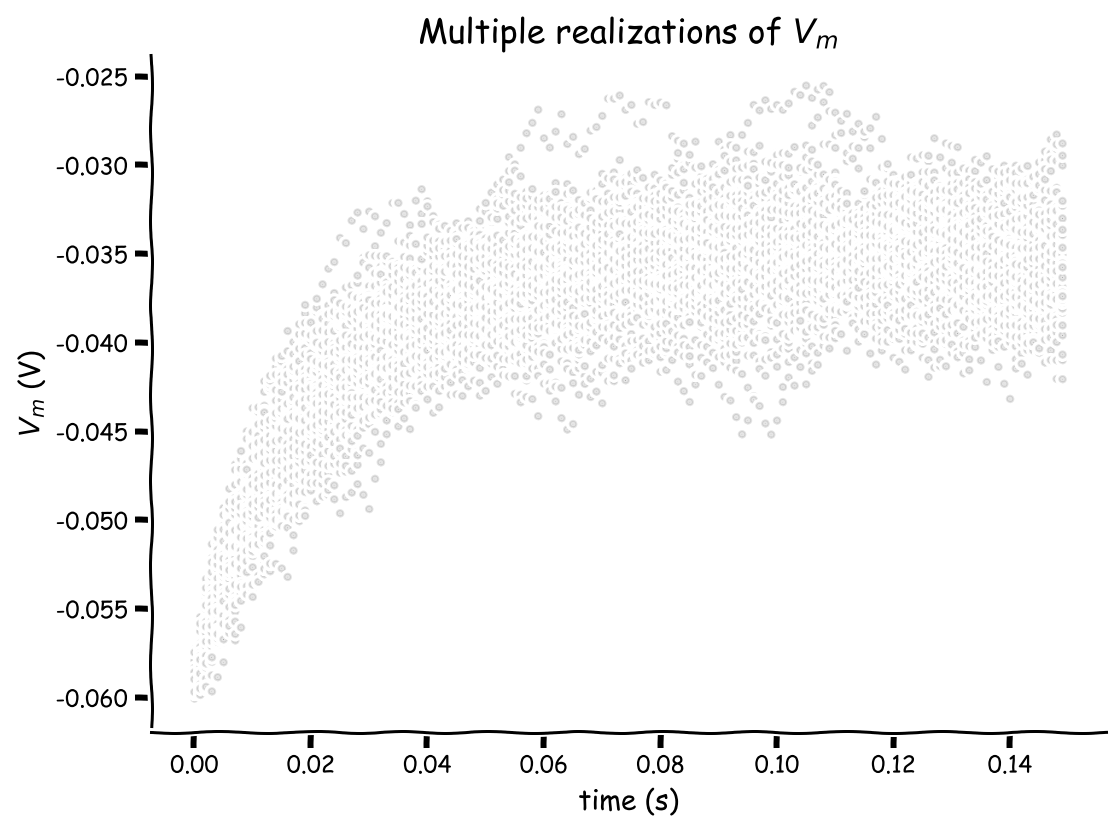

In [11]:
#################################################
## TODO for students: fill out code to store v in list ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to store v in list")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = n * [el]

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt/tau) * (el -  v_n[j] + r*i)

    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t]*n, v_n, 'k.', alpha = 0.1)

  # Display plot
  plt.show()

## Coding Exercise 9: Plotting sample mean
Add the sample mean ⟨V(t)⟩=1/N ∑V_n(t) to the plot.

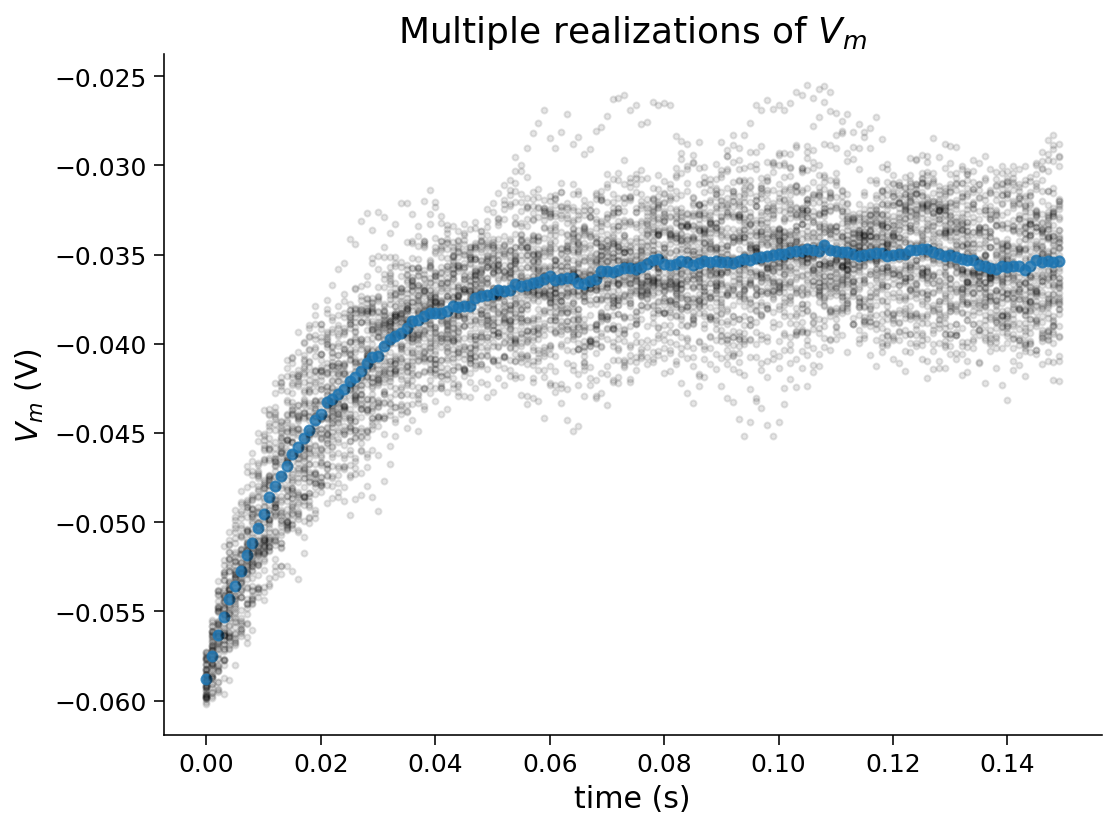

In [17]:
#################################################
## TODO for students: fill out code to plot sample mean ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to plot the sample mean")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean by summing list of v_n using sum, and dividing by n
  v_mean = sum(v_n)/n

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t,  v_mean, 'C0.' , alpha=0.8, markersize=10)

# Display plot
plt.show()

## Coding Exercise 10: Plotting sample standard deviation

In [18]:
squares = [x**2 for x in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


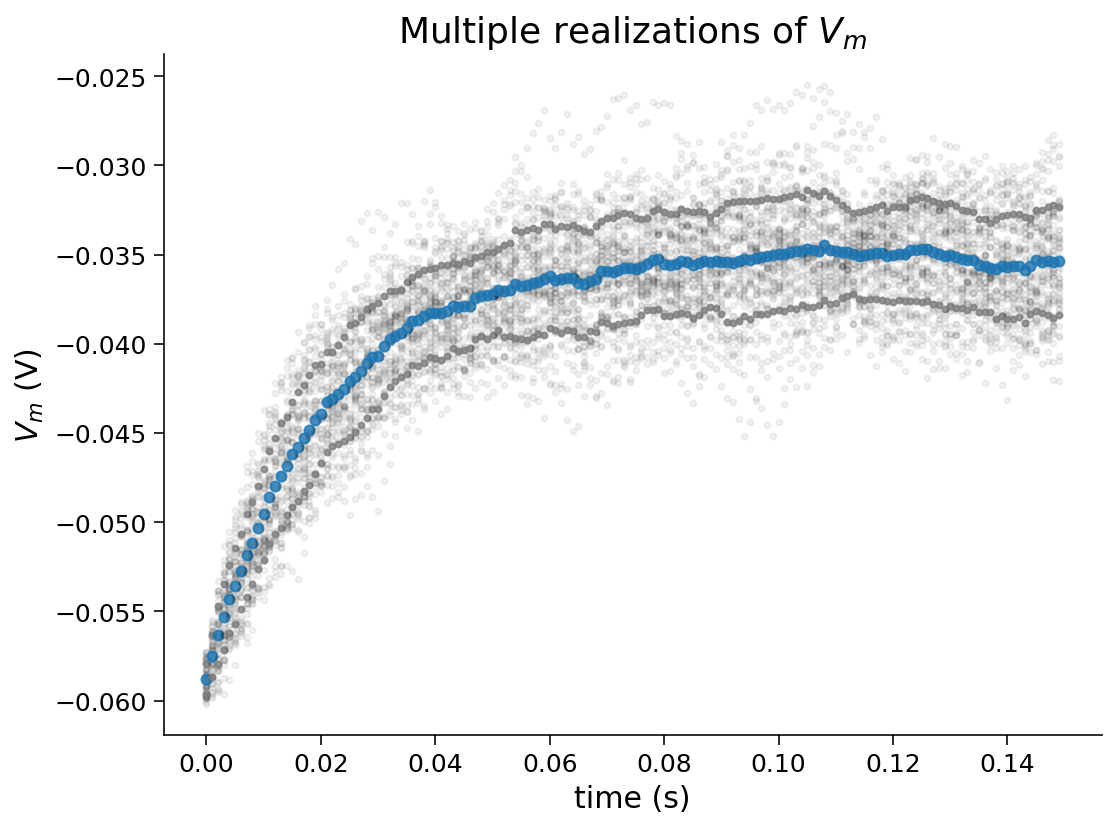

In [30]:
#################################################
## TODO for students: fill out code to plot sample standard deviation ##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to plot the sample standard deviation")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean
  v_mean = sum(v_n) / n

  # Initialize a list `v_var_n` with the contribution of each V_n(t) to
  # Var(t) with a list comprehension over values of v_n
  v_var_n = [(v - v_mean)**2 for v in v_n]

  # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
  v_var = sum (v_var_n)/(n-1)

  # Compute the standard deviation v_std with the function np.sqrt
  v_std = np.sqrt(v_var)

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.05)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

  # Plot mean + standard deviation with alpha=0.8 and argument 'C7.'
  plt.plot(t, v_mean + v_std, 'C7.', alpha = 0.8)

  # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
  plt.plot(t, v_mean - v_std, 'C7.', alpha = 0.8)


# Display plot
plt.show()

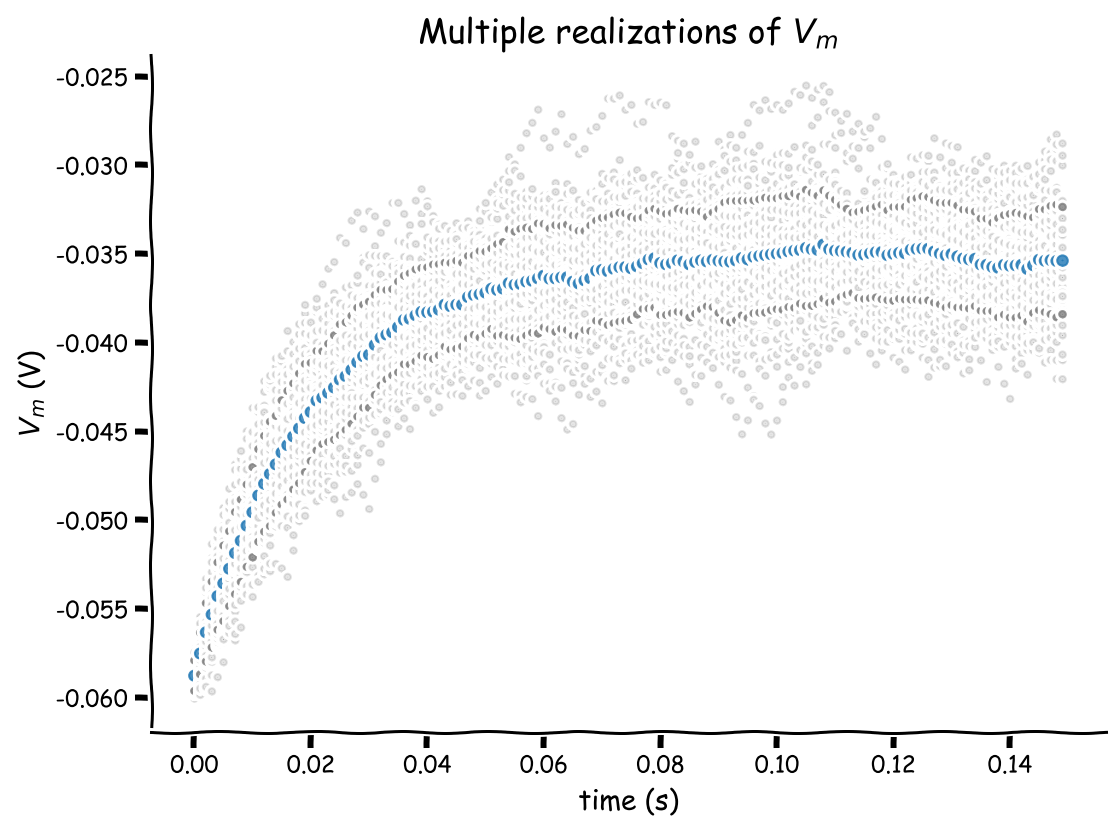

In [27]:

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    # Compute sample mean
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v - v_mean)**2 for v in v_n]

    # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n) / (n - 1)

    # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

    # Plot mean + standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8)

    # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)


  # Display plot
  plt.show()

# Coding Exercise 11: Rewriting with numpy

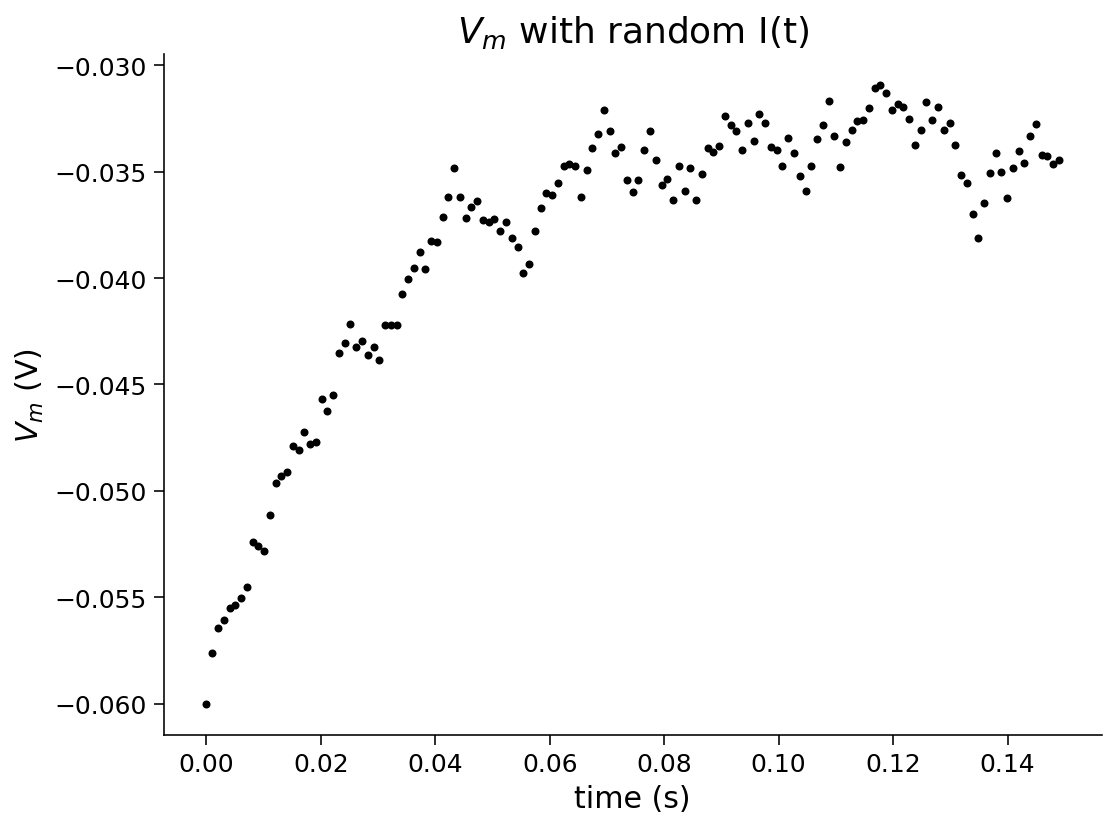

In [31]:
#################################################
## TODO for students: fill out code to rewrite simulation in numpy##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to rewrite simulation in numpy")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt)** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step - 1] + dt/tau * (el - v[step -1 ] + r * i[step])

# Plot membrane potential
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

# Coding Exercise 12: Using enumerate & indexing

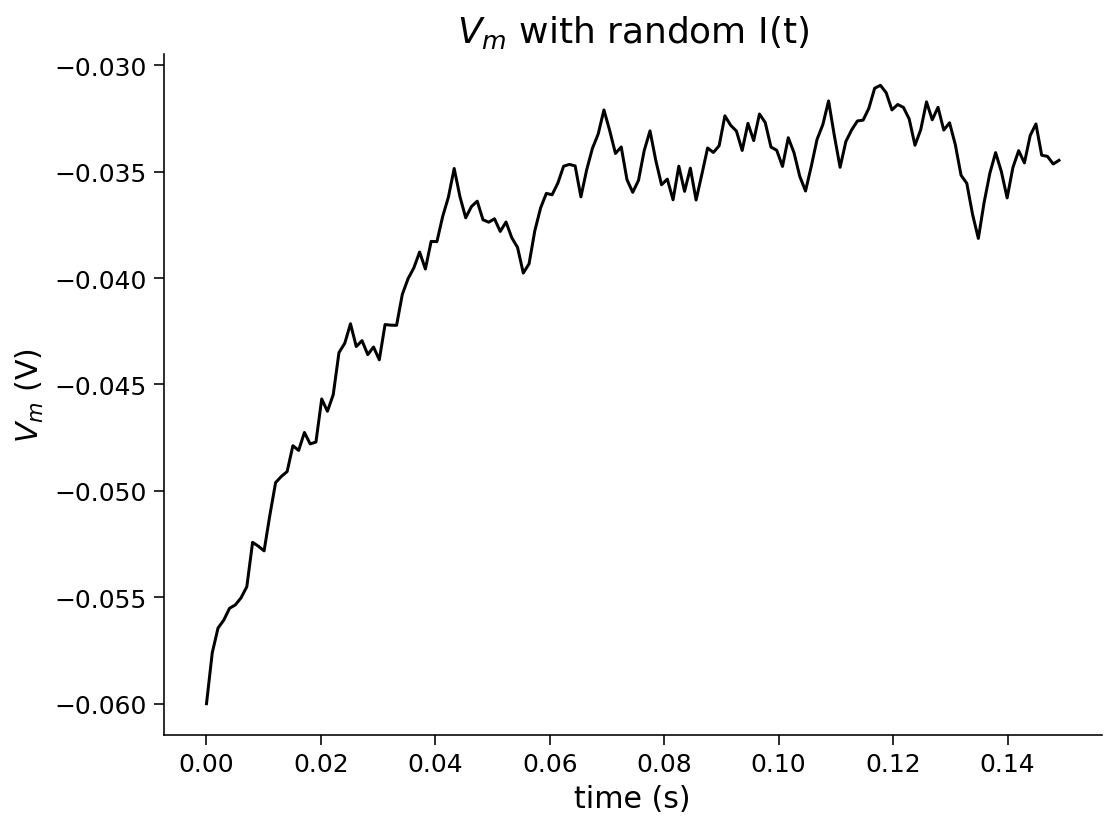

In [32]:
#################################################
## TODO for students: fill out code to rewrite simulation in numpy##
# Fill out code and comment or remove the next line
# raise NotImplementedError("Student exercise: You need to rewrite simulation in numpy")
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + dt/tau * (el - v[step -1 ] + r * i[step])

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()